In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


data_path = '/content/drive/MyDrive/indian_bird_call'

# Define function to extract MFCC features from an audio file
def extract_mfcc(file_path, n_mfcc=13):
    # Load the audio file using librosa
    y, sr = librosa.load(file_path, sr=None)
    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    # Compute the mean across the time axis for each MFCC
    mfcc_mean = np.mean(mfccs, axis=1)
    return mfcc_mean


def load_data(data_path):
    data = []
    labels = []
    # Get the list of class folders
    class_folders = sorted([d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))])


    label_mapping = {class_folder: idx for idx, class_folder in enumerate(class_folders)}

    for class_folder in class_folders:
        class_path = os.path.join(data_path, class_folder)
        for file in os.listdir(class_path):
            if file.endswith('.wav'):
                file_path = os.path.join(class_path, file)
                # Extract MFCC features from the audio file
                mfcc_features = extract_mfcc(file_path)
                data.append(mfcc_features)

                labels.append(label_mapping[class_folder])


    data = np.array(data)
    labels = np.array(labels)

    return data, labels

data, labels = load_data(data_path)


labels_categorical = to_categorical(labels, num_classes=len(np.unique(labels)))


X_train, X_test, y_train, y_test = train_test_split(data, labels_categorical, test_size=0.2, random_state=42)


model = Sequential([
    Dense(128, input_shape=(data.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(labels)), activation='softmax')
])


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=15, batch_size=10, validation_split=0.2)


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")




FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/indian_bird_call'

In [ ]:
import os
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


data_path = '/content/drive/MyDrive/indian_bird_call'

# Define function to extract MFCC features from an audio file
def extract_mfcc(file_path, n_mfcc=13):
    # Load the audio file using librosa
    y, sr = librosa.load(file_path, sr=None)
    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)


    return mfccs


def load_data(data_path):
    data = []
    labels = []
    # Get the list of class folders
    class_folders = sorted([d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))])


    label_mapping = {class_folder: idx for idx, class_folder in enumerate(class_folders)}

    for class_folder in class_folders:
        class_path = os.path.join(data_path, class_folder)
        for file in os.listdir(class_path):
            if file.endswith('.wav'):
                file_path = os.path.join(class_path, file)
                # Extract MFCC features from the audio file
                mfcc_features = extract_mfcc(file_path)
                data.append(mfcc_features)

                labels.append(label_mapping[class_folder])


    labels = np.array(labels)

    return data, labels

data, labels = load_data(data_path)


labels_categorical = to_categorical(labels, num_classes=len(np.unique(labels)))


X_train, X_test, y_train, y_test = train_test_split(data, labels_categorical, test_size=0.2, random_state=42)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(data.shape[1], data.shape[2], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(labels)), activation='softmax')
])



model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=15, batch_size=10, validation_split=0.2)


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")




AttributeError: 'list' object has no attribute 'shape'

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
def extract_mfcc(file_path, n_mfcc=13):
    """Extract MFCC features from an audio file."""
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    # Transpose MFCC to shape (num_mfcc, num_frames)
    mfccs = np.transpose(mfccs)
    return mfccs

def pad_or_truncate(array, target_shape):
    """Pad or truncate the array to match the target shape."""
    num_rows, num_columns = target_shape
    if array.shape[1] < num_columns:
        # Pad array with zeros if it's shorter than the target length
        padding = num_columns - array.shape[1]
        array = np.pad(array, ((0, 0), (0, padding)), mode='constant')
    elif array.shape[1] > num_columns:
        # Truncate array if it's longer than the target length
        array = array[:, :num_columns]

    # Ensure height matches the target number of MFCC coefficients
    if array.shape[0] != num_rows:
        # Pad or truncate the number of rows
        array = array[:num_rows, :]

    return array

def load_data(data_path, target_shape):
    """Load data from the specified path and shape it according to the target shape."""
    data = []
    labels = []
    # Get list of class folders
    class_folders = sorted([d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))])

    # Create label mapping
    label_mapping = {class_folder: idx for idx, class_folder in enumerate(class_folders)}

    # Load data and labels
    for class_folder in class_folders:
        class_path = os.path.join(data_path, class_folder)
        for file in os.listdir(class_path):
            if file.endswith('.wav'):
                file_path = os.path.join(class_path, file)
                # Extract MFCC features from audio file
                mfcc_features = extract_mfcc(file_path)
                # Pad or truncate MFCC features to the target shape
                mfcc_features = pad_or_truncate(mfcc_features, target_shape)
                # Add channel dimension (1)
                data.append(mfcc_features)
                labels.append(label_mapping[class_folder])

    # Convert data list to NumPy array and reshape to include channel dimension (1)
    data = np.array(data, dtype=np.float32).reshape(len(data), target_shape[0], target_shape[1], 1)
    labels = np.array(labels)

    return data, labels

# Define target shape (number of MFCC coefficients and target length)
num_mfcc_coefficients = 13  # Adjust as needed
target_length = 200  # Adjust as needed

# Define the target shape as (number of MFCC coefficients, target length)
target_shape = (num_mfcc_coefficients, target_length)

data, labels = load_data(data_path, target_shape)

# Convert labels to categorical format
labels_categorical = to_categorical(labels, num_classes=len(np.unique(labels)))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels_categorical, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(num_mfcc_coefficients, target_length, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(labels)), activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=15, batch_size=10, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv2d_8. Consider increasing the input size. Received input shape [None, 1, 48, 64] which would produce output shape with a zero or negative value in a dimension.

## STFT

In [ ]:
# Required packages
import os
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


data_path = '/content/drive/MyDrive/indian_bird_call'


def extract_stft(file_path, n_fft=2048, hop_length=512):
    # Load the audio file using librosa
    y, sr = librosa.load(file_path, sr=None)
    # Compute the Short-Time Fourier Transform
    stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
    # Get the amplitude spectrogram (magnitude)
    spectrogram = np.abs(stft)
    # Compute the log-amplitude to bring values to a more manageable range
    log_spectrogram = librosa.amplitude_to_db(spectrogram)
    # Compute the mean across the time axis for each frequency bin
    stft_mean = np.mean(log_spectrogram, axis=1)
    return stft_mean


def load_data(data_path):
    data = []
    labels = []
    class_folders = sorted([d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))])


    label_mapping = {class_folder: idx for idx, class_folder in enumerate(class_folders)}

    # Process each class folder and extract STFT features
    for class_folder in class_folders:
        class_path = os.path.join(data_path, class_folder)
        for file in os.listdir(class_path):
            if file.endswith('.wav'):
                file_path = os.path.join(class_path, file)
                stft_features = extract_stft(file_path)
                data.append(stft_features)

                labels.append(label_mapping[class_folder])


    data = np.array(data)
    labels = np.array(labels)

    return data, labels

data, labels = load_data(data_path)

labels_categorical = to_categorical(labels, num_classes=len(np.unique(labels)))

X_train, X_test, y_train, y_test = train_test_split(data, labels_categorical, test_size=0.2, random_state=42)


model = Sequential([
    Dense(128, input_shape=(data.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(labels)), activation='softmax')
])


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=15, batch_size=10, validation_split=0.2)


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/15
9/9 [==============================] - 2s 26ms/step - loss: 67.3850 - accuracy: 0.2683 - val_loss: 5.9507 - val_accuracy: 0.1905
Epoch 2/15
9/9 [==============================] - 0s 9ms/step - loss: 52.9293 - accuracy: 0.2073 - val_loss: 3.9394 - val_accuracy: 0.1905
Epoch 3/15
9/9 [==============================] - 0s 9ms/step - loss: 27.7306 - accuracy: 0.2073 - val_loss: 3.0996 - val_accuracy: 0.1905
Epoch 4/15
9/9 [==============================] - 0s 7ms/step - loss: 13.5841 - accuracy: 0.2683 - val_loss: 1.8948 - val_accuracy: 0.1429
Epoch 5/15
9/9 [==============================] - 0s 7ms/step - loss: 3.0870 - accuracy: 0.2683 - val_loss: 1.6819 - val_accuracy: 0.2381
Epoch 6/15
9/9 [==============================] - 0s 9ms/step - loss: 1.6818 - accuracy: 0.2683 - val_loss: 1.6184 - val_accuracy: 0.0952
Epoch 7/15
9/9 [==============================] - 0s 7ms/step - loss: 1.5922 - accuracy: 0.3293 - val_loss: 1.6197 - val_accuracy: 0.0952
Epoch 8/15
9/9 [=============

## Zero crossing rate

In [ ]:
data_path = '/content/drive/MyDrive/indian_bird_call'


def extract_zcr(file_path):
    y, sr = librosa.load(file_path, sr=None)
    # Calculate the zero-crossing rate (mean over time)
    zcr = librosa.feature.zero_crossing_rate(y)
    # Compute the mean zero-crossing rate
    zcr_mean = np.mean(zcr, axis=1)
    return zcr_mean


def load_data(data_path):
    data = []
    labels = []

    class_folders = sorted([d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))])


    label_mapping = {class_folder: idx for idx, class_folder in enumerate(class_folders)}

    # Process each class folder and extract ZCR features
    for class_folder in class_folders:
        class_path = os.path.join(data_path, class_folder)
        for file in os.listdir(class_path):
            if file.endswith('.wav'):
                file_path = os.path.join(class_path, file)

                zcr_features = extract_zcr(file_path)
                data.append(zcr_features)

                labels.append(label_mapping[class_folder])

    data = np.array(data)
    labels = np.array(labels)

    return data, labels


data, labels = load_data(data_path)


labels_categorical = to_categorical(labels, num_classes=len(np.unique(labels)))


X_train, X_test, y_train, y_test = train_test_split(data, labels_categorical, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(128, input_shape=(data.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(labels)), activation='softmax')
])


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=15, batch_size=10, validation_split=0.2)


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/15
9/9 [==============================] - 1s 26ms/step - loss: 1.6082 - accuracy: 0.2317 - val_loss: 1.6123 - val_accuracy: 0.0952
Epoch 2/15
9/9 [==============================] - 0s 9ms/step - loss: 1.6066 - accuracy: 0.3171 - val_loss: 1.6145 - val_accuracy: 0.0952
Epoch 3/15
9/9 [==============================] - 0s 9ms/step - loss: 1.6033 - accuracy: 0.2683 - val_loss: 1.6168 - val_accuracy: 0.0952
Epoch 4/15
9/9 [==============================] - 0s 9ms/step - loss: 1.6015 - accuracy: 0.2927 - val_loss: 1.6225 - val_accuracy: 0.0952
Epoch 5/15
9/9 [==============================] - 0s 7ms/step - loss: 1.5930 - accuracy: 0.3659 - val_loss: 1.6298 - val_accuracy: 0.0952
Epoch 6/15
9/9 [==============================] - 0s 7ms/step - loss: 1.5913 - accuracy: 0.3171 - val_loss: 1.6339 - val_accuracy: 0.0952
Epoch 7/15
9/9 [==============================] - 0s 7ms/step - loss: 1.5851 - accuracy: 0.3049 - val_loss: 1.6395 - val_accuracy: 0.0952
Epoch 8/15
9/9 [=================

## Energy

In [ ]:
def extract_energy(file_path, frame_length=2048, hop_length=512):

    y, sr = librosa.load(file_path, sr=None)

    energy = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)

    energy_mean = np.mean(energy, axis=1)
    return energy_mean


def load_data(data_path):
    data = []
    labels = []

    class_folders = sorted([d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))])


    label_mapping = {class_folder: idx for idx, class_folder in enumerate(class_folders)}


    for class_folder in class_folders:
        class_path = os.path.join(data_path, class_folder)
        for file in os.listdir(class_path):
            if file.endswith('.wav'):
                file_path = os.path.join(class_path, file)

                energy_features = extract_energy(file_path)
                data.append(energy_features)

                labels.append(label_mapping[class_folder])


    data = np.array(data)
    labels = np.array(labels)

    return data, labels

data, labels = load_data(data_path)


labels_categorical = to_categorical(labels, num_classes=len(np.unique(labels)))


X_train, X_test, y_train, y_test = train_test_split(data, labels_categorical, test_size=0.2, random_state=42)



# Compile the model with loss function, optimizer, and metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=15, batch_size=10, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/15
9/9 [==============================] - 1s 28ms/step - loss: 1.5729 - accuracy: 0.2439 - val_loss: 1.6922 - val_accuracy: 0.0952
Epoch 2/15
9/9 [==============================] - 0s 9ms/step - loss: 1.5758 - accuracy: 0.2073 - val_loss: 1.6964 - val_accuracy: 0.1429
Epoch 3/15
9/9 [==============================] - 0s 11ms/step - loss: 1.5684 - accuracy: 0.2561 - val_loss: 1.6983 - val_accuracy: 0.1429
Epoch 4/15
9/9 [==============================] - 0s 12ms/step - loss: 1.5817 - accuracy: 0.3049 - val_loss: 1.7029 - val_accuracy: 0.0952
Epoch 5/15
9/9 [==============================] - 0s 10ms/step - loss: 1.5750 - accuracy: 0.2805 - val_loss: 1.7071 - val_accuracy: 0.0952
Epoch 6/15
9/9 [==============================] - 0s 11ms/step - loss: 1.5630 - accuracy: 0.2927 - val_loss: 1.7066 - val_accuracy: 0.0952
Epoch 7/15
9/9 [==============================] - 0s 10ms/step - loss: 1.5871 - accuracy: 0.2439 - val_loss: 1.7114 - val_accuracy: 0.0952
Epoch 8/15
9/9 [============

In [ ]:
len(np.unique(labels))

5

## attemptng with melspec

In [ ]:
import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image

# Framing
SAMPLE_RATE = 22050
SIGNAL_LENGTH = 5  # Length of audio chunks (seconds)
SPEC_SHAPE = (128, 64)  # Shape of mel spectrograms (height, width)
FMIN = 20  # Minimum frequency for mel spectrogram
FMAX = SAMPLE_RATE // 2
# Define function to extract mel spectrograms from an audio file and save as images
def get_mel_spectrograms(filepath, primary_label, output_dir):
    # Load the audio file using librosa (limit to first 15 seconds)
    sig, rate = librosa.load(filepath, sr=SAMPLE_RATE, duration=15)

    # Split signal into chunks of 5 seconds each
    sig_splits = []
    for i in range(0, len(sig), int(SIGNAL_LENGTH * SAMPLE_RATE)):
        split = sig[i:i + int(SIGNAL_LENGTH * SAMPLE_RATE)]

        # Break if split is shorter than required
        if len(split) < int(SIGNAL_LENGTH * SAMPLE_RATE):
            break

        sig_splits.append(split)

    # Extract mel spectrograms for each chunk
    s_cnt = 0
    saved_samples = []
    for chunk in sig_splits:
        hop_length = int(SIGNAL_LENGTH * SAMPLE_RATE / (SPEC_SHAPE[1] - 1))
        mel_spec = librosa.feature.melspectrogram(
            y=chunk,
            sr=SAMPLE_RATE,
            n_fft=1024,
            hop_length=hop_length,
            n_mels=SPEC_SHAPE[0],
            fmin=FMIN,
            fmax=FMAX
        )

        # decibels and normalization
        mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
        mel_spec -= mel_spec.min()
        mel_spec /= mel_spec.max()


        save_dir = os.path.join(output_dir, primary_label)
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        save_path = os.path.join(save_dir, f"{filepath.split(os.sep)[-1].rsplit('.', 1)[0]}_{s_cnt}.png")
        im = Image.fromarray((mel_spec * 255.0).astype(np.uint8)).convert("L")
        im.save(save_path)

        saved_samples.append(save_path)
        s_cnt += 1

    return saved_samples

# Load data and extract mel spectrograms
def load_data(data_path, output_path):
    data = []
    labels = []
    # list of classes
    class_folders = sorted([d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))])

    # Create label mapping
    label_mapping = {class_folder: idx for idx, class_folder in enumerate(class_folders)}

    # processing the audio and then obtaining the mel spectrograms
    samples = []
    for class_folder in class_folders:
        class_path = os.path.join(data_path, class_folder)
        for file in os.listdir(class_path):
            if file.endswith('.wav'):
                file_path = os.path.join(class_path, file)
                # Extract mel spectrograms and save as images
                saved_samples = get_mel_spectrograms(file_path, class_folder, output_path)
                samples.extend(saved_samples)

    # Load images and labels from the saved spectrograms
    for sample in samples:
        # Load the spectrogram image
        img = load_img(sample, color_mode='grayscale', target_size=(SPEC_SHAPE[0], SPEC_SHAPE[1]))
        # Convert the image to a numpy array and normalize it
        img_array = img_to_array(img) / 255.0
        data.append(img_array)

        # Extract the label from the file path
        label = sample.split(os.sep)[-2]
        labels.append(label_mapping[label])


    data = np.array(data, dtype=np.float32)
    labels = np.array(labels)

    return data, labels


data_path = '/content/drive/MyDrive/indian_bird_call'
output_path = '/content/drive/MyDrive/birdcall_mel_spectrograms'

data, labels = load_data(data_path, output_path)

labels_categorical = to_categorical(labels, num_classes=len(np.unique(labels)))


X_train, X_test, y_train, y_test = train_test_split(data, labels_categorical, test_size=0.2, random_state=42)


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(SPEC_SHAPE[0], SPEC_SHAPE[1], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(labels)), activation='softmax')
])
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get model predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 62, 32)       320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 29, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 12, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 6, 128)       

In [ ]:
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(SPEC_SHAPE[0], SPEC_SHAPE[1], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(labels)), activation='softmax')
])
model2.summary()
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model2.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model2.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get model predictions on the test data
y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 126, 62, 32)       320       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 63, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 61, 29, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 30, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 12, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 14, 6, 128)       

Test Loss: 0.4696
Test Accuracy: 0.8333
3/3 [==============================] - 0s 7ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       1.00      0.90      0.95        21
           2       0.62      0.62      0.62        13
           3       0.86      0.75      0.80         8
           4       0.82      0.93      0.87        15

    accuracy                           0.83        72
   macro avg       0.82      0.81      0.82        72
weighted avg       0.84      0.83      0.83        72



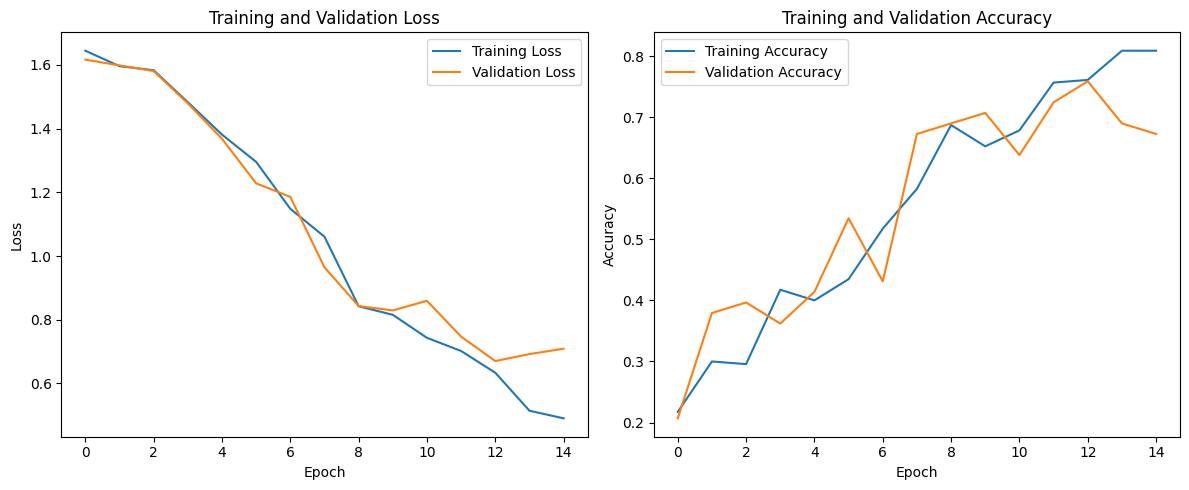

3/3 [==============================] - 0s 6ms/step - loss: 0.4696 - accuracy: 0.8333
Test Loss: 0.4696
Test Accuracy: 0.8333
3/3 [==============================] - 0s 3ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       1.00      0.90      0.95        21
           2       0.62      0.62      0.62        13
           3       0.86      0.75      0.80         8
           4       0.82      0.93      0.87        15

    accuracy                           0.83        72
   macro avg       0.82      0.81      0.82        72
weighted avg       0.84      0.83      0.83        72



In [ ]:
def plot_loss_accuracy_graphs(history):
    # Create a figure for the loss and accuracy graphs
    plt.figure(figsize=(12, 5))

    # Plot the loss graph
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Plot the accuracy graph
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Show the plots
    plt.tight_layout()
    plt.show()

plot_loss_accuracy_graphs(history)

# Evaluate the model on the test set
test_loss, test_accuracy = model2.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get model predictions on the test data
y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))

## Plotting the Mel-Spectrograms

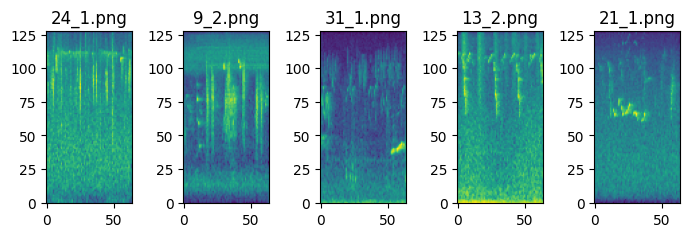

In [ ]:
import random
import matplotlib.pyplot as plt
from PIL import Image


output_path = '/content/drive/MyDrive/birdcall_mel_spectrograms'
# Function to randomly select and plot mel spectrograms
def plot_random_spectrograms(output_path, num_spectrograms=5):
    # Get a list of all image files in the output directory and subdirectories
    spectrogram_files = []
    for root, dirs, files in os.walk(output_path):
        for file in files:
            if file.endswith('.png'):
                spectrogram_files.append(os.path.join(root, file))

    # Randomly selecting `num_spectrograms` files from the list
    selected_files = random.sample(spectrogram_files, num_spectrograms)

    # Plotting the selected spectrograms
    plt.figure(figsize=(7, 7))
    for i, file_path in enumerate(selected_files):

        spec = Image.open(file_path)

        plt.subplot(1, num_spectrograms, i + 1)
        plt.title(file_path.split(os.sep)[-1])
        plt.imshow(spec, origin='lower', cmap='viridis')


    plt.tight_layout()
    plt.show()

plot_random_spectrograms(output_path, num_spectrograms=5)
